In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
!conda install -n fastbook -c conda-forge jupyterlab_widgets
!conda install -c conda-forge ipywidgets

In [18]:
import ipywidgets as widgets

In [19]:
from fastbook import *
from fastai.vision.widgets import *

In [20]:
from IPython.display import display

In [6]:
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')

In [21]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value=(), description='Upload')

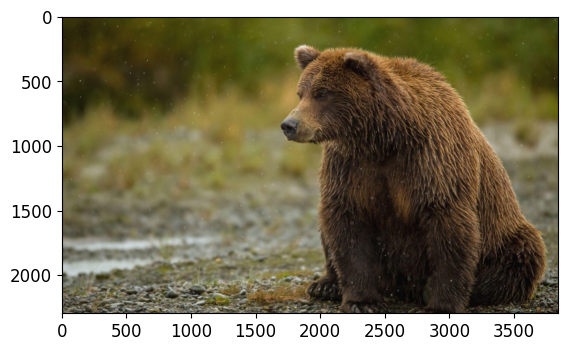

In [25]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
img = Image.open(BytesIO(btn_upload.value[-1].content))
plt.imshow(img)

In [26]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [27]:
pred,pred_idx,probs = learn_inf.predict(img)

In [28]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 1.0000')

In [29]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [30]:
def on_click_classify(change):
    img = Image.open(BytesIO(btn_upload.value[-1].content))  # change this
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    img = np.array(img)                                      # and add this
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'


btn_run.on_click(on_click_classify)

In [31]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [32]:
#hide_output
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [33]:
!pip install voila
!jupyter server extension enable --sys-prefix voila

Package jupyter_lsp took 0.0058s to import
A `_jupyter_server_extension_points` function was not found in jupyter_lsp. Instead, a `_jupyter_server_extension_paths` function was found and will be used for now. This function name will be deprecated in future releases of Jupyter Server.
Package jupyter_server_terminals took 0.0039s to import
Package jupyterlab took 0.0318s to import
Package notebook took 0.0000s to import
Package notebook_shim took 0.0000s to import
A `_jupyter_server_extension_points` function was not found in notebook_shim. Instead, a `_jupyter_server_extension_paths` function was found and will be used for now. This function name will be deprecated in future releases of Jupyter Server.
Package voila.server_extension took 0.0740s to import
Package voila took 0.0000s to import
Enabling: voila
- Writing config: /Users/laurapumpute/miniconda3/envs/fastbook/etc/jupyter
    - Validating voila...
      voila  OK
    - Extension successfully enabled.
